In [44]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [45]:
full_dataframe = pd.read_csv("Churn.csv", index_col=0, parse_dates=True)
full_dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,,
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [46]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)
full_dataframe.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 1 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract      

# Cleaning of Data.

In [47]:
full_dataframe.isnull().sum() # check if null

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:

# remove CID and blanks from total charges
full_dataframe=pd.DataFrame(full_dataframe.drop('customerID', axis = 1))
full_dataframe = full_dataframe[full_dataframe['TotalCharges'] != " "]
full_dataframe.dropna()
full_dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
full_dataframe.loc[full_dataframe["OnlineSecurity"] == "No internet service"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
12,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
17,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
22,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
23,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
34,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7020,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7021,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No


In [50]:
# changing yes no into 1/0
full_dataframe["MultipleLines"].replace("No phone service","No",inplace=True)
full_dataframe["OnlineSecurity"].replace("No internet service","No",inplace=True)
full_dataframe["OnlineBackup"].replace("No internet service","No",inplace=True)
full_dataframe["DeviceProtection"].replace("No internet service","No",inplace=True)
full_dataframe["TechSupport"].replace("No internet service","No",inplace=True)
full_dataframe["StreamingTV"].replace("No internet service","No",inplace=True)
full_dataframe["StreamingMovies"].replace("No internet service","No",inplace=True)

In [51]:
full_dataframe.loc[full_dataframe["OnlineSecurity"] == "No internet service"] # check to see if it's cleaned.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
pd.get_dummies(full_dataframe, columns=["Partner"]).head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes
#,,,,,,,,,,,,,,,,,,,,,
1,Female,0,No,1,No,No,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1
2,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0
3,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0
4,Male,0,No,45,No,No,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0
5,Female,0,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0


In [54]:
pd.get_dummies(full_dataframe, columns=["Contract"]).head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
#,,,,,,,,,,,,,,,,,,,,,
1,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,Yes,Electronic check,29.85,29.85,No,1,0,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,Mailed check,56.95,1889.5,No,0,1,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Yes,Mailed check,53.85,108.15,Yes,1,0,0
4,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,No,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Yes,Electronic check,70.70,151.65,Yes,1,0,0


In [55]:
pd.get_dummies(full_dataframe, columns=["PaymentMethod"]).head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
#,,,,,,,,,,,,,,,,,,,,,
1,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,Month-to-month,Yes,29.85,29.85,No,0,0,1,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,56.95,1889.5,No,0,0,0,1
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,53.85,108.15,Yes,0,0,0,1
4,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,One year,No,42.30,1840.75,No,1,0,0,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,70.70,151.65,Yes,0,0,1,0


In [56]:
from sklearn.preprocessing import LabelEncoder
colslabel =['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn']
full_dataframe[colslabel] = full_dataframe[colslabel].apply(LabelEncoder().fit_transform)
print(full_dataframe)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
#                                                                        
1          0              0        1           0       1             0   
2          1              0        0           0      34             1   
3          1              0        0           0       2             1   
4          1              0        0           0      45             0   
5          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7039       1              0        1           1      24             1   
7040       0              0        1           1      72             1   
7041       0              0        1           1      11             0   
7042       1              1        1           0       4             1   
7043       1              0        0           0      66             1   

      MultipleLines  InternetService 

# Split of data

80:20

In [57]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_dataframe, test_size=0.2)

In [58]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
6446,1,0,0,0,4,1,1,1,1,0,0,0,1,0,0,0,2,90.65,367.95,0
286,0,0,0,0,22,1,1,1,0,0,0,0,0,0,1,1,1,76.00,1783.6,0
5438,0,1,0,0,20,1,1,0,0,0,0,0,0,1,0,1,3,61.60,1174.35,1
1201,1,0,0,0,37,1,1,1,0,1,0,1,1,1,1,1,1,104.50,3778,0
1358,1,0,1,0,48,1,1,1,1,1,1,0,1,1,0,1,0,111.45,5315.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,1,0,0,0,1,1,0,2,0,0,0,0,0,0,0,1,3,19.90,19.9,0
3411,1,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,1,53.40,188.7,1
5464,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,44.35,44.35,1


In [59]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
#,,,,,,,,,,,,,,,,,,,,
1215,1,0,0,0,19,1,1,1,0,0,0,0,0,1,0,1,0,86.00,1532.45,1
6800,0,0,0,0,70,1,1,1,1,1,1,0,1,1,2,1,3,111.15,7737.55,0
946,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,0,0,74.40,215.8,1
5317,1,0,1,1,49,1,1,1,0,1,1,0,1,0,1,1,2,93.65,4520.15,0
6669,0,0,0,0,38,1,1,1,0,0,1,1,1,1,0,1,2,103.65,3988.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,1,0,1,1,64,1,0,0,1,0,1,1,1,0,2,0,3,69.25,4447.75,0
3478,0,0,0,0,18,1,1,1,0,0,0,0,0,0,0,1,2,74.15,1345.75,0
1728,1,0,0,0,31,1,1,0,0,1,0,1,1,0,0,1,2,71.05,2168.15,0


In [60]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
y = pd.DataFrame(train['Churn'])
X = pd.DataFrame(train.drop('Churn', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators = 300, 
                                 max_depth = 10)       
rforest.fit(X_train, y_train.Churn.ravel())

RandomForestClassifier(max_depth=10, n_estimators=300)

Train Data
Accuracy  :	 0.8963677927355854

TPR Train :	 0.7236328125
TNR Train :	 0.9570889117748026

FPR Train :	 0.04291108822519739
FNR Train :	 0.2763671875


<AxesSubplot:>

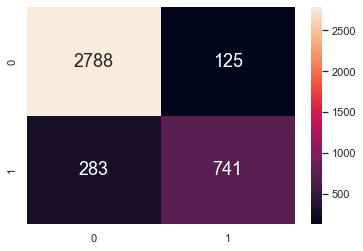

In [61]:
from sklearn.metrics import confusion_matrix
y_train_pred = rforest.predict(X_train)
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1]
tnTrain = cmTrain[0][0]
fnTrain = cmTrain[1][0]
print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7920616113744076

TPR Test :	 0.47468354430379744
TNR Test :	 0.9159802306425041

FPR Test :	 0.08401976935749589
FNR Test :	 0.5253164556962026


<AxesSubplot:>

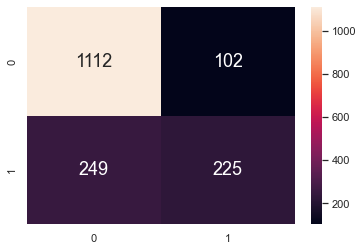

In [62]:

from sklearn.metrics import confusion_matrix
y_test_pred = rforest.predict(X_test)
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1]
tnTest = cmTest[0][0]
fnTest = cmTest[1][0]
print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [63]:
##Hyper parameter testing
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Churn.ravel())

KeyboardInterrupt: 

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=7, n_estimators=400)
0.8059459232838189


In [ ]:
train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,0.002090,-0.000188,0.010226,0.002663,-0.015925,-0.006719,-0.008394,-0.020065,-0.007845,-0.014174,-0.010699,-0.009816,-0.007313,-0.002286,-0.008360,0.015342,-0.014771,-0.004039
SeniorCitizen,0.002090,1.000000,0.007387,-0.214316,0.022171,0.004290,0.142686,-0.033767,-0.042268,0.071291,0.061184,-0.061018,0.113158,0.129668,-0.141586,0.152940,-0.044868,0.222749,0.149306
Partner,-0.000188,0.007387,1.000000,0.453712,0.384971,0.009512,0.135479,-0.012353,0.144207,0.144041,0.160921,0.125164,0.130847,0.127633,0.294662,-0.012168,-0.156683,0.103463,-0.151233
Dependents,0.010226,-0.214316,0.453712,1.000000,0.154791,-0.004399,-0.024924,0.041462,0.072955,0.018727,0.012948,0.065771,-0.016808,-0.042490,0.232188,-0.103816,-0.043835,-0.112540,-0.165951
tenure,0.002663,0.022171,0.384971,0.154791,1.000000,0.005303,0.333877,-0.037498,0.327715,0.361284,0.365060,0.324343,0.281072,0.290588,0.672532,0.009032,-0.372455,0.254583,-0.347331
PhoneService,-0.015925,0.004290,0.009512,-0.004399,0.005303,1.000000,0.277414,0.384973,-0.098304,-0.054203,-0.077507,-0.107248,-0.012705,-0.028810,-0.002789,0.021999,0.002604,0.245946,0.008095
MultipleLines,-0.006719,0.142686,0.135479,-0.024924,0.333877,0.277414,1.000000,-0.003017,0.100765,0.196525,0.196442,0.102871,0.264571,0.261254,0.101512,0.171200,-0.169231,0.493047,0.047028
InternetService,-0.008394,-0.033767,-0.012353,0.041462,-0.037498,0.384973,-0.003017,1.000000,-0.396413,-0.317259,-0.311996,-0.396516,-0.237483,-0.248115,0.088444,-0.136905,0.096686,-0.325546,-0.041895
OnlineSecurity,-0.020065,-0.042268,0.144207,0.072955,0.327715,-0.098304,0.100765,-0.396413,1.000000,0.289436,0.278144,0.361872,0.178472,0.195790,0.251711,-0.008044,-0.159382,0.299254,-0.172118
OnlineBackup,-0.007845,0.071291,0.144041,0.018727,0.361284,-0.054203,0.196525,-0.317259,0.289436,1.000000,0.296340,0.293284,0.282702,0.279680,0.154625,0.129991,-0.174417,0.441893,-0.083233


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
tcharge = pd.DataFrame(train['TotalCharges'])   # Response
tchurn = pd.DataFrame(train['Churn'])       # Predictor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tcharge, tchurn, test_size = 0.20)

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/donseokangrui/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7324444444444445

In [ ]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

/Users/donseokangrui/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.728

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/var/folders/46/g66j24312r3b6hm5pd1nb6lr0000gn/T/ipykernel_95701/2692549809.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.64

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
digits = load_digits()

folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [ ]:
scores_logistic

In [ ]:
scores_svm

In [ ]:
scores_rf

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)


In [ ]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)


In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)


In [ ]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

In [ ]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

# Removing outliers

Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [76]:
full_dataframe['TotalCharges'] = pd.to_numeric(full_dataframe.TotalCharges, errors='coerce') # convert TotalCharges from object to Float.

In [77]:
Data = pd.DataFrame(full_dataframe, columns=['TotalCharges'])
TotalCharges =  pd.DataFrame(full_dataframe['TotalCharges'])
Data.head()

,TotalCharges
#,
1,29.85
2,1889.50
3,108.15
4,1840.75
5,151.65


<AxesSubplot:>

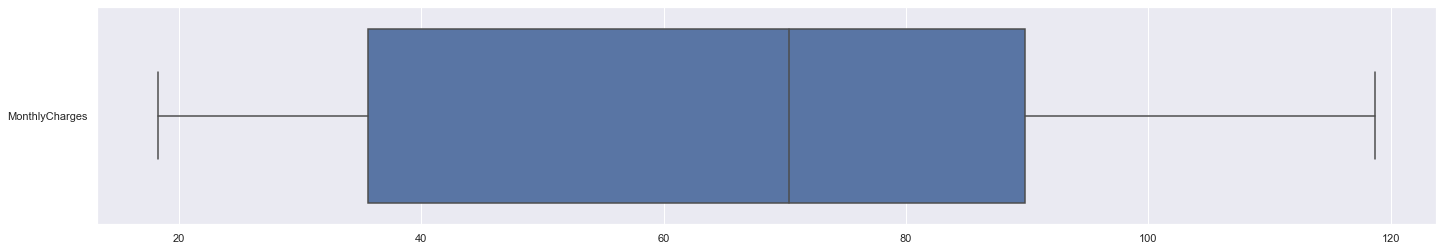

In [94]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=TotalCharges,orient = "h")

In [78]:
TotalCharges.describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [72]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 20)


In [73]:
# Extract only the numeric data variables
numeric_q1_data = pd.DataFrame(full_dataframe[['TotalCharges']])

# Summary Statistics for all Variables
numeric_q1_data.describe().round(2)

,TotalCharges
count,7032
unique,6530
top,20.2
freq,11


In [88]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
Data < (Q1 - 1.5 * IQR)
Data > (Q3 + 1.5 * IQR)

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [85]:
print("Data type : ", type(Data_clean))
print("Data dims : ", Data_clean.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 1)


MonthlyCharges

In [95]:
Data = pd.DataFrame(full_dataframe, columns=['MonthlyCharges'])
MonthlyCharges =  pd.DataFrame(full_dataframe['MonthlyCharges'])
Data.head()

,MonthlyCharges
#,
1,29.85
2,56.95
3,53.85
4,42.30
5,70.70


<AxesSubplot:>

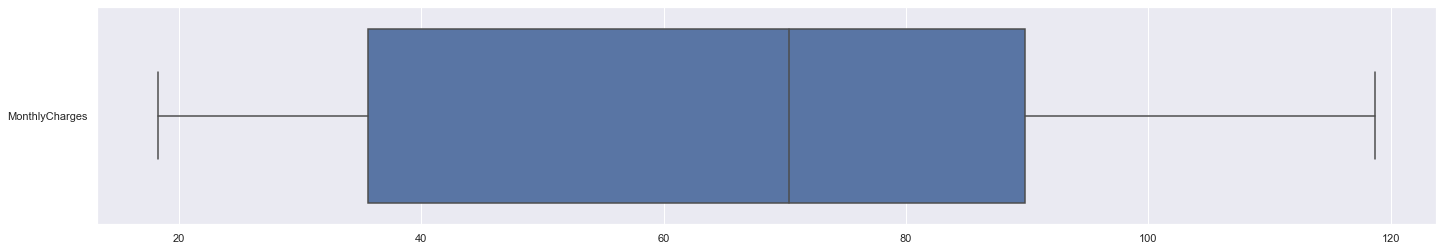

In [96]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=MonthlyCharges,orient = "h")

In [97]:
print("Data type : ", type(full_dataframe))
print("Data dims : ", full_dataframe.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 20)


In [98]:
# Extract only the numeric data variables
numeric_q1_data = pd.DataFrame(full_dataframe[['MonthlyCharges']])

# Summary Statistics for all Variables
numeric_q1_data.describe().round(2)

,MonthlyCharges
count,7032.00
mean,64.80
std,30.09
min,18.25
25%,35.59
50%,70.35
75%,89.86
max,118.75


In [99]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
Data < (Q1 - 1.5 * IQR)
Data > (Q3 + 1.5 * IQR)

Data_clean= Data[~((Data < (Q1 - 1.5 * IQR)) |(Data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [100]:
print("Data type : ", type(Data_clean))
print("Data dims : ", Data_clean.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (7032, 1)


Tenure

In [102]:
Data = pd.DataFrame(full_dataframe, columns=['tenure'])
tenure =  pd.DataFrame(full_dataframe['tenure'])
Data.head()

,tenure
#,
1,1
2,34
3,2
4,45
5,2


<AxesSubplot:>

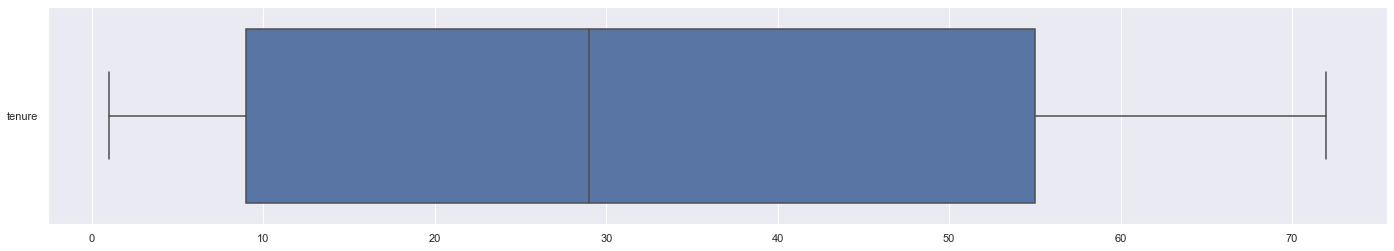

In [103]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data=tenure,orient = "h")